# Data Triage & Exploratory Data Analysis (EDA)

Load Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.dates as mdates
import tensorflow as tf
from statsmodels.tsa.api import SimpleExpSmoothing
from sklearn.model_selection import TimeSeriesSplit

Load Dataset

In [2]:
df = pd.read_csv('/Users/tavneetbahia/Documents/GitHub/Coding_assessment_Naimuri/covid_19_data_2020.csv')
df.head()

,ObservationID,ObservationDate,State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


Ensure dates and times are within the same and correct format.

In [4]:
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'], infer_datetime_format= True)
df.head()

/var/folders/1w/ywc8zxl51nxb7699kws9q3p40000gn/T/ipykernel_42298/285736481.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['ObservationDate'] = pd.to_datetime(df['ObservationDate'], infer_datetime_format= True)


,ObservationID,ObservationDate,State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


Look into descriptive statistics of dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98252 entries, 0 to 98251
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ObservationID    98252 non-null  int64         
 1   ObservationDate  98252 non-null  datetime64[ns]
 2   State            67096 non-null  object        
 3   Country          98252 non-null  object        
 4   Last Update      98252 non-null  object        
 5   Confirmed        98252 non-null  float64       
 6   Deaths           98252 non-null  float64       
 7   Recovered        98252 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 6.0+ MB


From here it can be seen there a identifiable null values in the state category

In [6]:
df.describe()

,ObservationID,ObservationDate,Confirmed,Deaths,Recovered
count,98252.000000,98252,98252.000000,98252.000000,9.825200e+04
mean,49126.500000,2020-06-15 15:09:15.323047168,15442.707232,692.502310,8.392821e+03
min,1.000000,2020-01-22 00:00:00,0.000000,0.000000,0.000000e+00
25%,24563.750000,2020-05-14 00:00:00,181.000000,2.000000,2.000000e+00
50%,49126.500000,2020-06-24 00:00:00,1622.000000,31.000000,2.870000e+02
75%,73689.250000,2020-07-27 00:00:00,8301.250000,264.000000,2.850000e+03
max,98252.000000,2020-08-29 00:00:00,801422.000000,42072.000000,2.140614e+06
std,28363.053661,NaN,46813.313272,2712.094164,4.751247e+04


In [7]:
df.describe(include='all')

,ObservationID,ObservationDate,State,Country,Last Update,Confirmed,Deaths,Recovered
count,98252.000000,98252,67096,98252,98252,98252.000000,98252.000000,9.825200e+04
unique,NaN,NaN,722,223,1962,NaN,NaN,NaN
top,NaN,NaN,Unknown,US,3/8/20 5:31,NaN,NaN,NaN
freq,NaN,NaN,796,10906,1232,NaN,NaN,NaN
mean,49126.500000,2020-06-15 15:09:15.323047168,NaN,NaN,NaN,15442.707232,692.502310,8.392821e+03
min,1.000000,2020-01-22 00:00:00,NaN,NaN,NaN,0.000000,0.000000,0.000000e+00
25%,24563.750000,2020-05-14 00:00:00,NaN,NaN,NaN,181.000000,2.000000,2.000000e+00
50%,49126.500000,2020-06-24 00:00:00,NaN,NaN,NaN,1622.000000,31.000000,2.870000e+02
75%,73689.250000,2020-07-27 00:00:00,NaN,NaN,NaN,8301.250000,264.000000,2.850000e+03
max,98252.000000,2020-08-29 00:00:00,NaN,NaN,NaN,801422.000000,42072.000000,2.140614e+06


Checking null values to determine the best course of action.

In [8]:
df[df.State.isnull()]

,ObservationID,ObservationDate,State,Country,Last Update,Confirmed,Deaths,Recovered
35,36,2020-01-22,NaN,Japan,1/22/2020 17:00,2.0,0.0,0.0
36,37,2020-01-22,NaN,Thailand,1/22/2020 17:00,2.0,0.0,0.0
37,38,2020-01-22,NaN,South Korea,1/22/2020 17:00,1.0,0.0,0.0
73,74,2020-01-23,NaN,Japan,1/23/20 17:00,1.0,0.0,0.0
74,75,2020-01-23,NaN,Thailand,1/23/20 17:00,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...
97673,97674,2020-08-29,NaN,West Bank and Gaza,2020-08-30 04:28:22,21668.0,147.0,14631.0
97674,97675,2020-08-29,NaN,Western Sahara,2020-08-30 04:28:22,10.0,1.0,8.0
97675,97676,2020-08-29,NaN,Yemen,2020-08-30 04:28:22,1946.0,563.0,1113.0
97676,97677,2020-08-29,NaN,Zambia,2020-08-30 04:28:22,11902.0,284.0,11092.0


In [9]:
df_country =df[df.Country == 'Zimbabwe']
df_country.nunique()

ObservationID      163
ObservationDate    163
State                0
Country              1
Last Update        160
Confirmed          119
Deaths              48
Recovered           79
dtype: int64

It appears that the State values for some countries were left blank and for others state was recorded some time after records of COVID cases were obtained. Hence, best course of action is to remove the State column as we cannot derive meaningful insights at a state level. Instead, country level analysis should take place. Also, the 'Last Update' column will also be removed as no useful insights can be derived as the last update should correspond to the observation date.

In [10]:
df1 = df.drop(columns=['State', 'Last Update'], axis=1)
df1.head()

,ObservationID,ObservationDate,Country,Confirmed,Deaths,Recovered
0,1,2020-01-22,Mainland China,1.0,0.0,0.0
1,2,2020-01-22,Mainland China,14.0,0.0,0.0
2,3,2020-01-22,Mainland China,6.0,0.0,0.0
3,4,2020-01-22,Mainland China,1.0,0.0,0.0
4,5,2020-01-22,Mainland China,0.0,0.0,0.0


In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98252 entries, 0 to 98251
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ObservationID    98252 non-null  int64         
 1   ObservationDate  98252 non-null  datetime64[ns]
 2   Country          98252 non-null  object        
 3   Confirmed        98252 non-null  float64       
 4   Deaths           98252 non-null  float64       
 5   Recovered        98252 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 4.5+ MB


Visualising the trends of confirmed cases of covid on global level

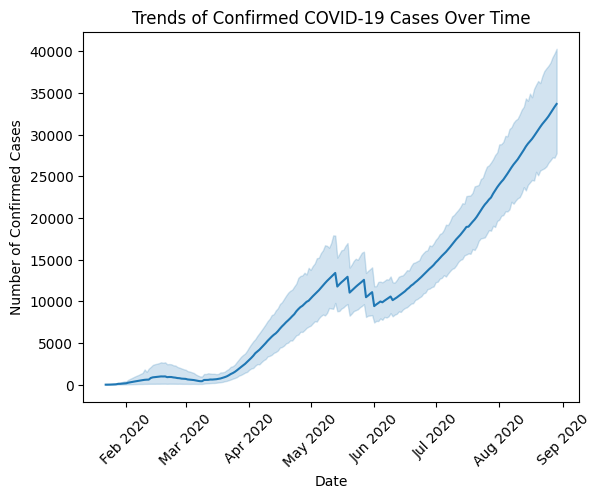

In [12]:
sns.lineplot(data=df1, x='ObservationDate', y='Confirmed')
plt.title('Trends of Confirmed COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
# Format tick labels as "Mon YYYY"
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.ylabel('Number of Confirmed Cases')
plt.xticks(rotation=45)
plt.show()

Visualising the trends of deaths from covid on global level

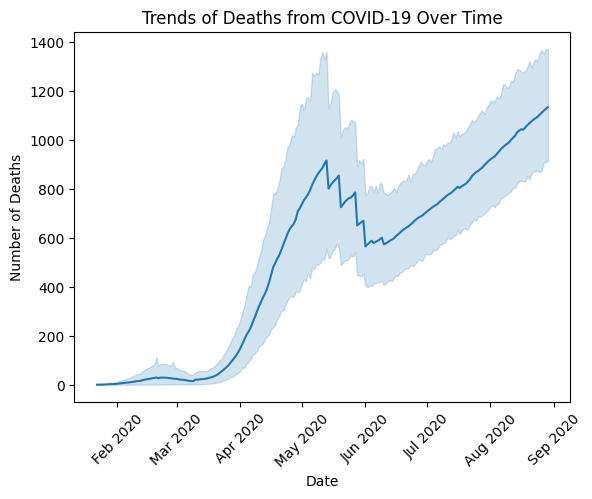

In [13]:
sns.lineplot(data=df1, x='ObservationDate', y='Deaths')
plt.title('Trends of Deaths from COVID-19 Over Time')
plt.xlabel('Date')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
# Format tick labels as "Mon YYYY"
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.ylabel('Number of Deaths')
plt.xticks(rotation=45)
plt.show()

Visualising the trends of recovered cases of covid on global level

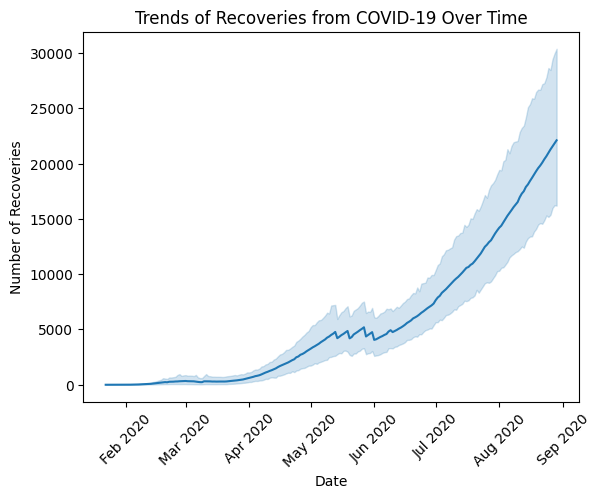

In [14]:
sns.lineplot(data=df1, x='ObservationDate', y='Recovered')
plt.title('Trends of Recoveries from COVID-19 Over Time')
plt.xlabel('Date')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
# Format tick labels as "Mon YYYY"
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.ylabel('Number of Recoveries')
plt.xticks(rotation=45)
plt.show()

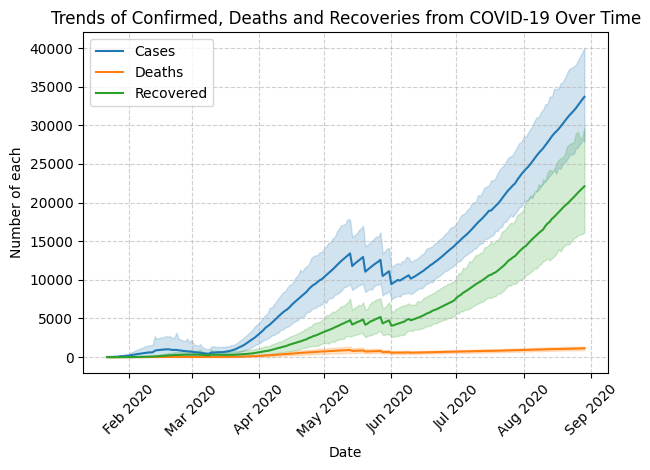

In [15]:

sns.lineplot(data=df1, x='ObservationDate', y='Confirmed',label='Cases')
sns.lineplot(data=df1, x='ObservationDate', y='Deaths', label='Deaths')
sns.lineplot(data=df1, x='ObservationDate', y='Recovered', label='Recovered')

plt.title("Trends of Confirmed, Deaths and Recoveries from COVID-19 Over Time")
plt.xlabel("Date")
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
# Format tick labels as "Mon YYYY"
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)
plt.ylabel("Number of each")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

From the plots above it can be shown the COVID-19 cases increased exponentially with brief period beteween May 2020 and June 2020 having a downward trend. Deaths followed the confirmed cases trend but the number of which was less than cases. Recovered cases remained largely at the same rate.

Grouping countries based on regions: EMEA, APAC, AMER

Grouping countries by GDP to measure the effect of socio-economic standing on covid cases

Crucially, identify and document any major data quality issues, limitations, or
potential biases in this dataset. What key questions can't be answered with this
data alone?

Major data quality issues is the lack of reporting within the State column and different date and time formats in the Last Updated column. Due to these, a limitation of this dataset is that we are unable to extract trends on a state level to determine whether cities across the globe had more of an increase in covid cases then in rural areas. A potential bias is that countries with good socio-economic standing, the State column is filled out and the insights derived from these countires could not be applied to other countries of different socia-economic standing. 

Key questions that can't be answered by the data alone are:
    The trend of confirmed cases, deaths and recovered cases on a State level for each country.
    The impact of lockdowns on the cases, deaths and recovered cases.
    The impact of having an aging population on the cases, deaths and recovered cases.
    Which age group in each country were more suscpetible to COVID.
    The impact of the COVID vaccine.

# Baseline Forecasting & Experiment Design

Hypothesis and Methodology

A GARCH model with LSTM will outperform a simple exponential smoothing model in the prediction of confirmed cases, deaths and recoveries.

Recently, there was a study published '' where the GARCH with LSTM outperformed a standard GARCH model in predicting stock prices. As the dataset is a time series data similar to stock prices, it is worth to confirm that this modelling can be applied to the covid dataset.

Splitting data

In [16]:
tss = TimeSeriesSplit(n_splits = 3)

In [17]:
df1.head()

,ObservationID,ObservationDate,Country,Confirmed,Deaths,Recovered
0,1,2020-01-22,Mainland China,1.0,0.0,0.0
1,2,2020-01-22,Mainland China,14.0,0.0,0.0
2,3,2020-01-22,Mainland China,6.0,0.0,0.0
3,4,2020-01-22,Mainland China,1.0,0.0,0.0
4,5,2020-01-22,Mainland China,0.0,0.0,0.0


In [18]:
df1.set_index('ObservationDate', inplace=True)
df1.sort_index(inplace=True)
X1 = df1.drop(columns=['Confirmed', 'Deaths', 'Recovered'], axis=1)
y1 = df1['Confirmed']
y2 = df1['Deaths']
y3 = df1['Recovered']

In [19]:
for train_index, test_index in tss.split(X1):
    X_train, X_test = X1.iloc[train_index, :], X1.iloc[test_index,:]
    y1_train, y1_test = y1.iloc[train_index], y1.iloc[test_index]
    y2_train, y2_test = y2.iloc[train_index], y2.iloc[test_index]
    y3_train, y3_test = y3.iloc[train_index], y3.iloc[test_index]

In [20]:
y1_train.head()

ObservationDate
2020-01-22     1.0
2020-01-22    14.0
2020-01-22     6.0
2020-01-22     1.0
2020-01-22     0.0
Name: Confirmed, dtype: float64

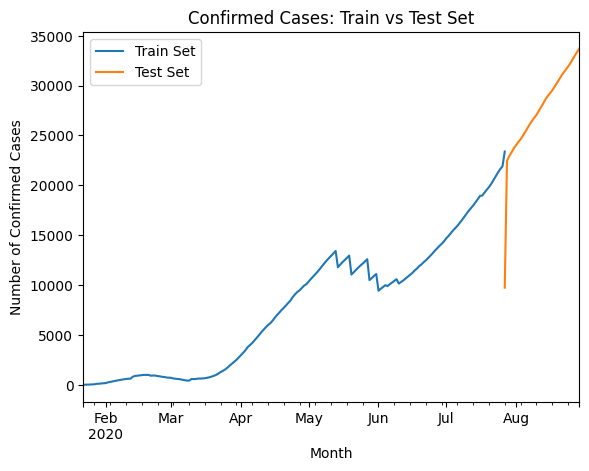

In [21]:

y1_train.groupby('ObservationDate').mean().plot()
y1_test.groupby('ObservationDate').mean().plot()
plt.xlabel('Month')
plt.ylabel('Number of Confirmed Cases')
plt.title('Confirmed Cases: Train vs Test Set')
plt.legend(['Train Set', 'Test Set'])
plt.show()

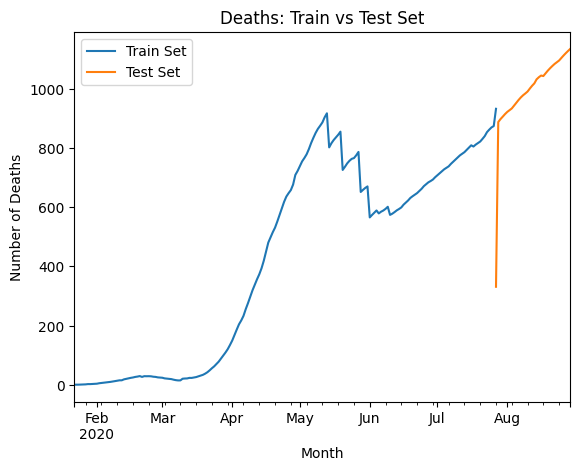

In [23]:

y2_train.groupby('ObservationDate').mean().plot()
y2_test.groupby('ObservationDate').mean().plot()
plt.xlabel('Month')
plt.ylabel('Number of Deaths')
plt.title('Deaths: Train vs Test Set')
plt.legend(['Train Set', 'Test Set'])
plt.show()

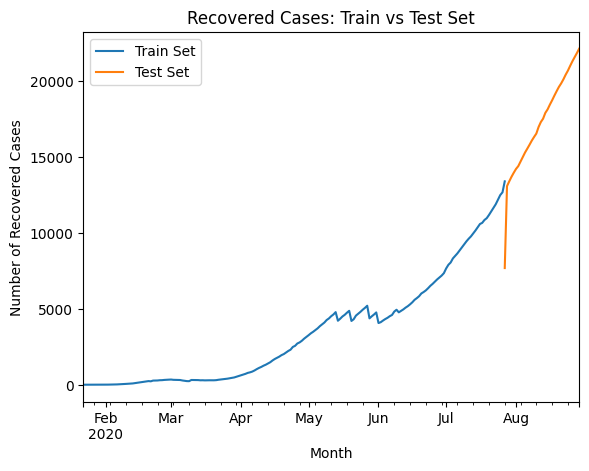

In [24]:

y3_train.groupby('ObservationDate').mean().plot()
y3_test.groupby('ObservationDate').mean().plot()
plt.xlabel('Month')
plt.ylabel('Number of Recovered Cases')
plt.title('Recovered Cases: Train vs Test Set')
plt.legend(['Train Set', 'Test Set'])
plt.show()

Training model

Confirmed cases

In [27]:
model = SimpleExpSmoothing(y1_train)
model_single_fit = model.fit()

/Users/tavneetbahia/.pyenv/versions/tensorflow-env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [28]:
forecast_single = model_single_fit.forecast(30)
print(forecast_single)

73689    21991.513645
73690    21991.513645
73691    21991.513645
73692    21991.513645
73693    21991.513645
73694    21991.513645
73695    21991.513645
73696    21991.513645
73697    21991.513645
73698    21991.513645
73699    21991.513645
73700    21991.513645
73701    21991.513645
73702    21991.513645
73703    21991.513645
73704    21991.513645
73705    21991.513645
73706    21991.513645
73707    21991.513645
73708    21991.513645
73709    21991.513645
73710    21991.513645
73711    21991.513645
73712    21991.513645
73713    21991.513645
73714    21991.513645
73715    21991.513645
73716    21991.513645
73717    21991.513645
73718    21991.513645
dtype: float64


/Users/tavneetbahia/.pyenv/versions/tensorflow-env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/tavneetbahia/.pyenv/versions/tensorflow-env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


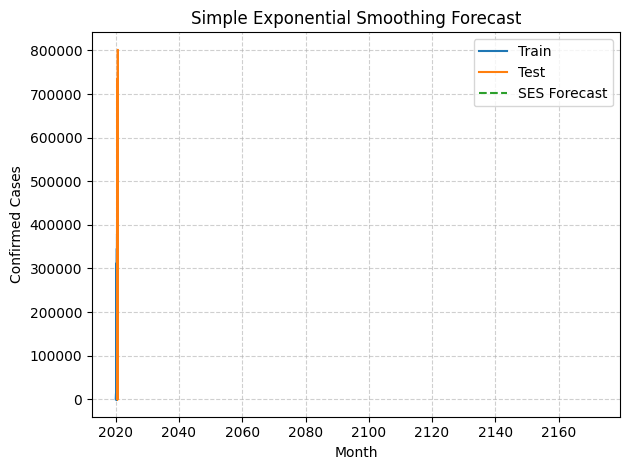

In [32]:

plt.plot(y1_train, label='Train')
plt.plot(y1_test, label='Test')
plt.plot(forecast_single, label='SES Forecast', linestyle='--')
plt.title('Simple Exponential Smoothing Forecast')
plt.xlabel('Month')
plt.ylabel('Confirmed Cases')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Deaths

Recoveries

Testing

GARCH with LSTM model using tensorflow

Simple exponential smoothing model

# Strategic Recommendations

## Stakeholder Summary

## Production & Lifecycle

## Next Steps & Data Strategy